<a href="https://colab.research.google.com/github/annikagroendal/my_site/blob/main/lab_1_1_vibe_coding_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import statements here

# Lab 1 - Vibe coding in Colab with Gemini.

**Context.** The phrase *vibe coding* refers to the act of using an LLM to write your code instead of writing the code yourself.

**Lab Objectives.**
1. Practice vibe coding in Colab using Gemini,
2. Investigate two problems with both a parametric model and non-parametric models for regression, namely ordinary least squares (OLS) and k nearest neighbors (kNN).
3. Identify when a parametric model is advantagous.
4. Learn to be the boss of the LLM.

**Rules.**
1. Use `polars` for data management.
2. Use the assignment expression to assign values to variables.
3. Make clean visualization code using either `plotnine` or `seaborn`.
4. Display all important information using judicuous applications of multiple cells.
5. Avoid the following: `print`, `for`, and unnecessary functions using `def`

## Problem 1 - Loading and inspecting the data

**Link.** `https://www.statlearning.com/s/Advertising.csv`

**Tasks.**
1. Open a code cell and text cell below this cell and use these to capture your work.  Add cells as needed!
2. Ask Gemini to load the data without extra guidance.  What package did it use?
3. Now ask Gemini to load the data using `polars`.  Did it use assignment statement or the assignment expression?  What was the consequence?  Did it use `print`?
4. Again, ask Gemini to load the data using `polars`, but this time using the `"Assignment expression with the walrus operator"`.  Comment on the results.
5. There is a problem with the columns.  Inspect the columns and find the problem.  Use data verbs (select, filter, mutate) to fix the issue.

In [1]:
import pandas as pd

advertising_df = pd.read_csv('https://www.statlearning.com/s/Advertising.csv')
display(advertising_df.head())

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Loading data with `polars` (assignment expression vs. assignment statement)

In [2]:
import polars as pl

advertising_df_polars = pl.read_csv('https://www.statlearning.com/s/Advertising.csv')
display(advertising_df_polars.head())

,TV,radio,newspaper,sales
i64,f64,f64,f64,f64
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
import polars as pl

(advertising_df_polars_walrus := pl.read_csv('https://www.statlearning.com/s/Advertising.csv')).head()

,TV,radio,newspaper,sales
i64,f64,f64,f64,f64
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
(advertising_df_fixed := advertising_df_polars_walrus.drop('')).head()

TV,radio,newspaper,sales
f64,f64,f64,f64
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9


<font color="orange">
2. Without specifying, Geimini uses pandas to load the data.
3. Gemini used the assignment expression and it did NOT use print. By using the assignment expression the data table was printed while simultaneously saving the data to the variable advertising_df_polars_walrus. A consequence of asking Gemini this prompt is that it adds the word "walrus" to the variable name because we specified to use the walrus operator.
4. After adding the command from question 4, Gemini went back and added code that used the assignment statement instead so that we could now compare the results between the assignment statement (had to use display to show the results) and assignment expression (automatically prints).
5. The table adds an unlabled row ID column. As a result I aksed Gemini to drop the column all-together because it does not add any predictive value when progressing through the regression problem.
<font>

## Problem 2 - Visualize the data

1. Open a code cell and text cell below this cell and use these to capture your work.  Add cells as needed!
2. Ask Gemini visualize the data with sales as y and the other variables as the x values.  What package did it use?
3. Repeat the last step, but specify that we use `seaborn`.
4. Do this again, but this time use `plotnine`

**Questions.**
1. Compare and contrast the three implementations of the graphs.  Which is cleaner code?  Which do you prefer?
2. Comment on the relationship between the explanatory variables and the response.

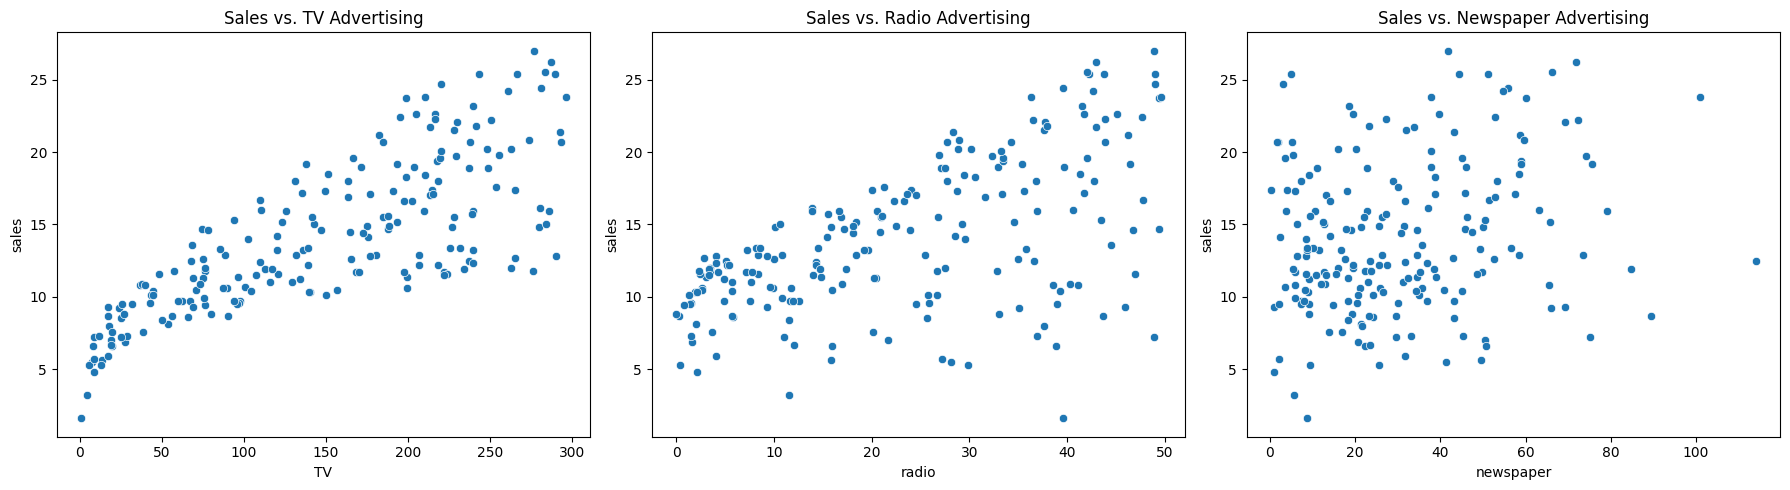

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Polars DataFrame to Pandas DataFrame for easier plotting with Seaborn
advertising_df_pandas = advertising_df_fixed.to_pandas()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=advertising_df_pandas, x='TV', y='sales', ax=axes[0])
axes[0].set_title('Sales vs. TV Advertising')

sns.scatterplot(data=advertising_df_pandas, x='radio', y='sales', ax=axes[1])
axes[1].set_title('Sales vs. Radio Advertising')

sns.scatterplot(data=advertising_df_pandas, x='newspaper', y='sales', ax=axes[2])
axes[2].set_title('Sales vs. Newspaper Advertising')

plt.tight_layout()
plt.show()

### Visualizing data using `plotnine`

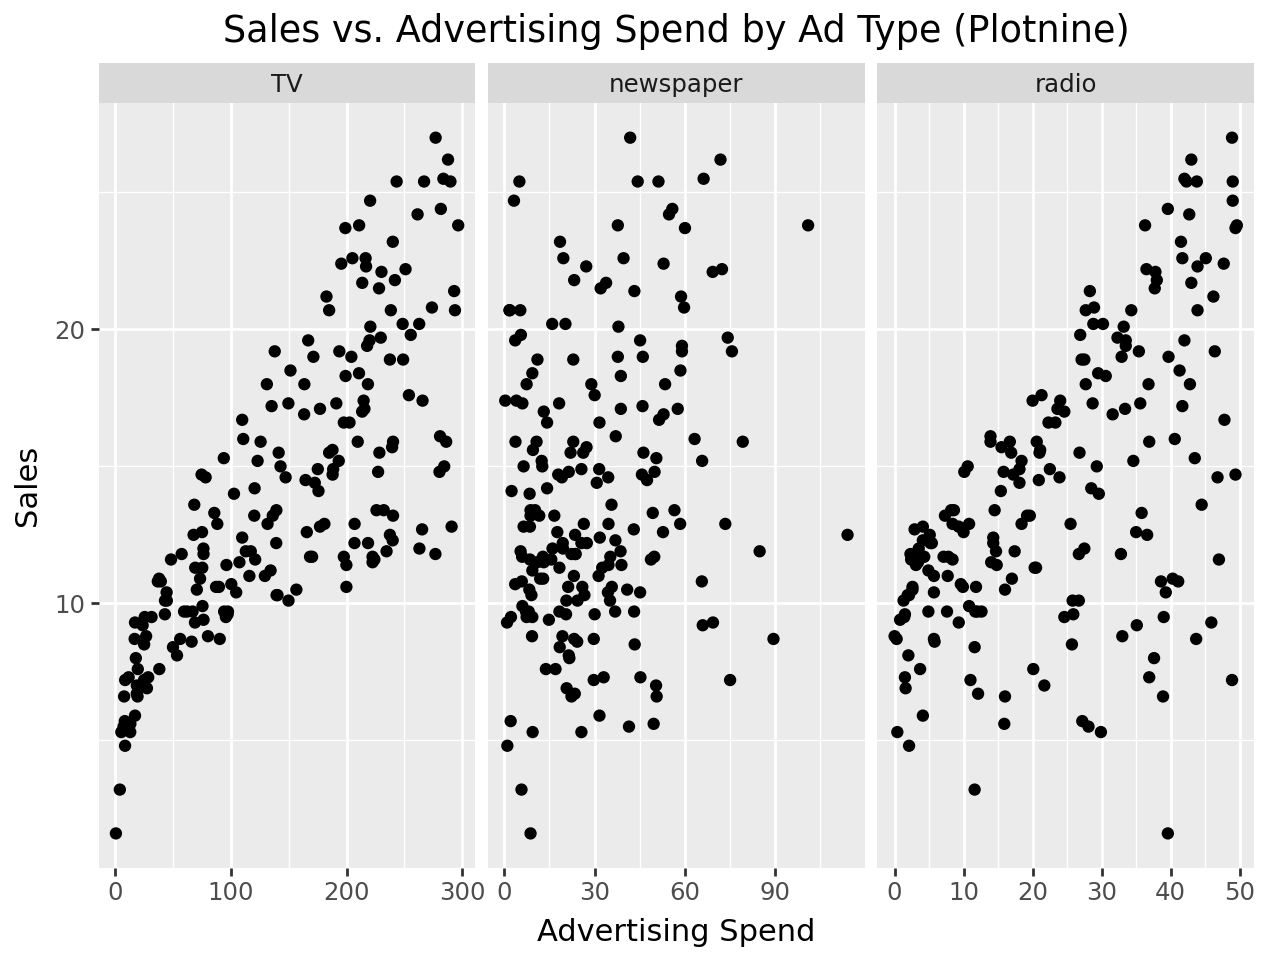

In [6]:
from plotnine import ggplot, aes, geom_point, facet_wrap, labs

# Plotnine works well with pandas DataFrames
# The advertising_df_pandas variable was created when making the seaborn plots.

plot = (
    ggplot(advertising_df_pandas.melt(id_vars='sales', var_name='Ad_Type', value_name='Spend'),
           aes(x='Spend', y='sales'))
    + geom_point()
    + facet_wrap('~Ad_Type', scales='free_x')
    + labs(title='Sales vs. Advertising Spend by Ad Type (Plotnine)',
           x='Advertising Spend', y='Sales')
)

plot

<font color="orange">

2. Gemini used seaborn and matplotlib.pyplot to create the visualizations when unprompted.
3. When promopted to use seaborn, Gemini tells you that it has already done a visualization using seaborn and then asks if you want a visualization using plotnine as requested by the next step of the question.
4. When prompted to use plotnine, the first rendition of code written by Gemini did not print any visualizations. I had to ask Gemini to re-write their code so that the visualizations would display.

**Questions**
1. In my opinion, the code using seaborn is slightly easier to read and write in this scenario, although I am more familiar with ggplot due to previous experience in R. The display using seaborn is much cleaner than the visualization created using plotnine.
2. When examining the relationship between the explanatory variables and the response variable, we see that TV is highly positively correlated with Sales, Radio is moderately positively correlated with Sales, and Newspaper has a weak positive correlation with Sales. For both TV and Radio, we see that the variation in responses tends to increase as our explanatory variables increases, suggesting a violation in constant variance.

## Problem 3 - Extracting the features and creating a test set.

1. Ask Gemini to split the data into an X and y without any extract context.
 How did it do?  Any issues?
2. Repeat the last prompt, but add the context of which columns are in X and y.  Did this fix any issues?  
3. Did the results get switched to pandas or numpy?  If not, tell Gemini to redo the last step and add this additional step.
4. Ask Gemini "split the data into training and test data" with no additional context.  What happened?  Was this an acceptable approach?
5. Redo the last step, but now specify that `train_test_split` from `sklearn` should be used.  Better?

In [7]:
# Extract features (X) and target (y) from the Polars DataFrame
X = advertising_df_fixed.select(['TV', 'radio', 'newspaper'])
y = advertising_df_fixed.select('sales')

display(X.head())
display(y.head())

TV,radio,newspaper
f64,f64,f64
230.1,37.8,69.2
44.5,39.3,45.1
17.2,45.9,69.3
151.5,41.3,58.5
180.8,10.8,58.4


sales
f64
22.1
10.4
9.3
18.5
12.9


In [8]:
# Convert X and y Polars DataFrames to Pandas DataFrames
X_pandas = X.to_pandas()
y_pandas = y.to_pandas()

display(X_pandas.head())
display(y_pandas.head())

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


### Splitting data into training and test sets

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (default 75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_pandas, y_pandas, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (150, 3)
Shape of X_test: (50, 3)
Shape of y_train: (150, 1)
Shape of y_test: (50, 1)


<font color="orange">

1. Gemini correctly selected the three explanatory variables as X and used Sales as our y variable.
2. Gemini successfully split the X and y variables, so when prompted again it said that the data has already been split.
3. After asking Gemini to convert X and y to either pandas or numpy, it converted both to pandas.
4. Gemini used train_test_split to create training and testing sets, and used 75% of the data to train and 25% to test, which is an acceptable approach. Gemini added four print statements afterwards that were unnecessary. While working through this entire assignment, Gemini seems to be reading the prompts from the Questions and will "skip ahead" and provide the code I want in the end (i.e. rather than doing the code wrong to begin with, it will see that the question want us to eventually use train_test_split so it will start with that format immediately).
5. N/A

<font>

## Problem 4 - Case 1: Prediction.

First, suppose our primary goal is to build the model with the best predictive performance.  Use Gemini to fit both a linear regression model as well as k nearest neighbors regressor using the training data then test the performance using the test data.  

**Questions.**
1. Which model is better? Be sure that you use MSPE to compare the results.
2. Linear regression (OLS) is an example of a parametric model, since the model can be written out with an equation involving some parameters.  Find and interpret the parameters of the fitted model.
3. kNN is an example of a non-parametric model, since it doesn't include a model specification involving an equation with parameters.  In this context (pure prediction), is there any down-side to the lack of parameters?  Explain.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_model.predict(X_test)

# Calculate Mean Squared Prediction Error (MSPE)
mspe_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSPE: {mspe_linear:.2f}")

Linear Regression MSPE: 2.88


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize and fit the kNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5) # Using 5 neighbors as a common starting point
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate Mean Squared Prediction Error (MSPE)
mspe_knn = mean_squared_error(y_test, y_pred_knn)
print(f"k-Nearest Neighbors Regressor MSPE: {mspe_knn:.2f}")

k-Nearest Neighbors Regressor MSPE: 2.48


In [12]:
print(f"Linear Regression Intercept: {linear_model.intercept_[0]:.2f}")
print("Linear Regression Coefficients:")
for feature, coef in zip(X_train.columns, linear_model.coef_[0]):
    print(f"  {feature}: {coef:.2f}")

Linear Regression Intercept: 2.78
Linear Regression Coefficients:
  TV: 0.05
  radio: 0.19
  newspaper: 0.00


### Interpretation of Linear Regression Parameters

*   **Intercept:** This represents the estimated sales when all advertising expenditures (TV, radio, and newspaper) are zero. In this context, it suggests a baseline level of 2.78 sales even without any advertising.

*   **Coefficients:** These values indicate the change in sales for a one-unit increase in the corresponding advertising medium, holding all other advertising expenditures constant.
    *   **TV :** For every one-unit increase in TV advertising expenditure, sales are estimated to increase by 0.05 units, assuming radio and newspaper advertising remain unchanged.
    *   **Radio:** For every one-unit increase in radio advertising expenditure, sales are estimated to increase by 0.19 units, assuming TV and newspaper advertising remain unchanged.
    *   **Newspaper:** For every one-unit increase in newspaper advertising expenditure, sales are estimated to increase by 0 units, assuming TV and radio advertising remain unchanged. In other words, newspaper has a minimal effect on sales (0) after accounting for all other variables.

<font color="orange">
1. When purely looking at the the MSPE, the k-Nearest Neighbors Regressor is better than the linear regression model (2.48 vs. 2.88).
2. See above for parameters and interpretations generated by Gemini.
3. If the goal is purely prediction, there isn't a downside to losing the interpretability of a model.

<font>

## Problem 5 - Case 2: Exploring association.

**Objective.** We want to answer the following questions?
1. Which media are associated with sales?
2. Which media generate the biggest boost in sales? and
3. How large of an increase in sales is associated with a given increase
in TV advertising?


**Answers.**
<font color="orange">
1. TV and Radio are significnatly predictors of sales (p-value = 0.000 for both), but newspaper is not a significant predictor of sales(p-value = 0.860).
2. TV is the most significant predictor of sales, as it exemplifies the largest t statistic (smallest p-value).
3. After accounting for all other factors, a 1-unit increase in TV advertising is associated with an increase of 0.0458 sales on average.

</font>

**Questions.**
1. Which model is better in this case? Why?
2. What is the advantage of the parametric and linear nature of the OLS model?
 How might this help us answer the questions?
3. How might you answer our questions using kNN, and consequently, what is the disadvantage of the non-parametric nature of kNN in this context?

**Answers.**
<font color="orange">
1. Since the interpretability of the factors is important for decision making (i.e. which advertising to invst in), the linear regression model is better. Furthermore, the linear regression model has a R-squared value of 0.897, which indiciates that the model is able to explain 89.7% of the total variability in sales.
2. As mentioned above, the linear nature of the OLS model allows us to interpret our parameters, which would prove beneficial to seeing which advertising methods are the most influential of sales.
3. The non-parametric aspect of the kNN model makes the goal of finding which factors are associated with sales nearly impossible, highlighting the biggest disadvantage of non-parametric methods: lack of interpretability. The kNN should be used if the only goal of the model is prediction.

</font>

## Problem 6 - Answer the previous questions.

Now use OLS and what you have learned in STAT 360 to answer the questions posed in the previous problem.

**Hint.** You should

1. refit the model using `statsmodels` to take advantage of all the staty goodness,
2. Be sure to consider things like uncertainty and problems with multiple comparisons, and
3. Ask Gemini for help, if for example, you want to use Tukey's method.

In [13]:
import statsmodels.formula.api as smf

df_sm = X_pandas.copy()
df_sm['sales'] = y_pandas['sales']

model = smf.ols('sales ~ TV + radio + newspaper', data=df_sm).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           1.58e-96
Time:                        17:42:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Problem 7 - Vibe-coding wrap up.

**Questions.**
1. What should we do if an LLM like Gemini uses a sub-optimal package to performa a task?
2. What is the alternative to the assignment statement?  Why is using this alternative beneficial when working in a notebook?
3. What is the alternative to using `print` calls when working in a notebook?  Why is the alternative approach beneficial?
4. What should we do if an LLM like Gemini includes unnecessarily complex code, e.g., multiple messy print class?
5. Who is incharge, you or the LLM?

**Answers.**

<font color="orange">

1. Control the LLM and ask it to use the more desireable package
2. The alternative is the assignment expression, which is beneficial because it simultaneously saves the information into a variable AND displays the results.
3. Either the walrus operator (which autmoatically displays the results), or using the display function. These alternatives are cleaner and more effecient to display code, with the walrus operator being the best choice for producing clean code.
4. When Gemini includes unnecessarily complex code, use your own coding knowlegde to simplify and produce readable code.
5. I am in charge, not the LLM.

</font>

